<a href="https://colab.research.google.com/github/Sahilgupta100/pw_skills_assignment/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mlxtend.plotting import plot_decision_regions

warnings.filterwarnings('ignore')

In [54]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100,n_features=2,n_redundant=0,n_informative=2,random_state=1,n_clusters_per_class=1)

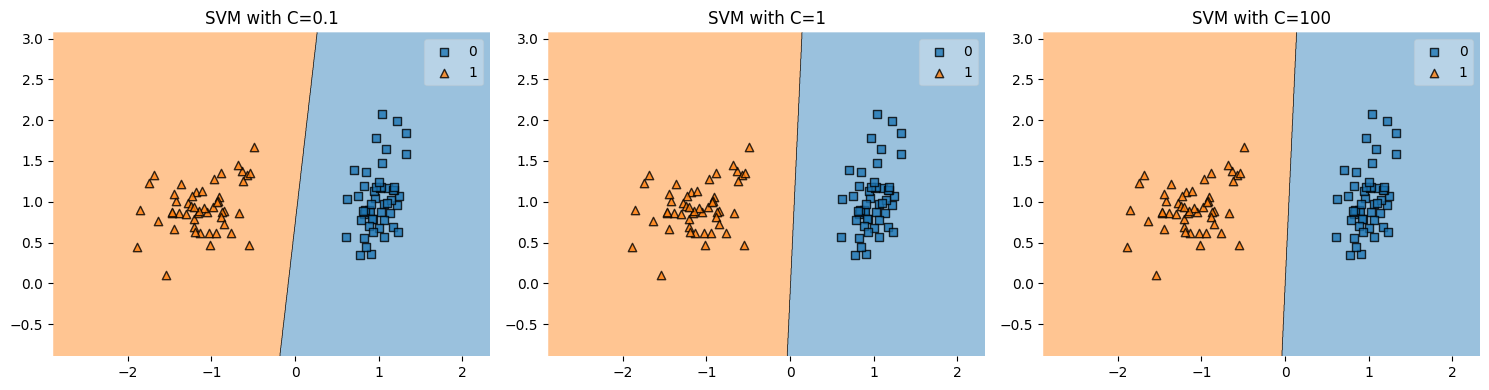

In [55]:
from sklearn.svm import SVC
C_values = [0.1, 1, 100]
plt.figure(figsize=(15, 4))

for idx, C in enumerate(C_values):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)
    plt.subplot(1, 3, idx + 1)
    plot_decision_regions(X, y, clf=model)
    plt.title(f"SVM with C={C}")

plt.tight_layout()
plt.show()

## 2. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features


In [56]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import numpy as np

# Create binary dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)
X_binary = (X > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.3, random_state=42)

model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.76


## 3. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data


In [57]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X, y = datasets.load_breast_cancer(return_X_y=True)

# Without scaling
model_unscaled = SVC(kernel='rbf')
score_unscaled = cross_val_score(model_unscaled, X, y, cv=5).mean()

# With scaling
pipeline = Pipeline([('scaler', StandardScaler()), ('svm', SVC(kernel='rbf'))])
score_scaled = cross_val_score(pipeline, X, y, cv=5).mean()

print("Accuracy without scaling:", score_unscaled)
print("Accuracy with scaling:", score_scaled)


Accuracy without scaling: 0.9121720229777983
Accuracy with scaling: 0.9736376339077782


##4. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy (GaussianNB):", accuracy_score(y_test, y_pred))

# Note: Laplace Smoothing is not used in GaussianNB, it is used in Multinomial/BernoulliNB.


Accuracy (GaussianNB): 0.9415204678362573


## 5. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=3)
grid.fit(X, y)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.9543024227234754


##6. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy


In [60]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=2, n_redundant=10,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without class weights
model_no_weights = SVC()
model_no_weights.fit(X_train, y_train)
y_pred_no_weights = model_no_weights.predict(X_test)
acc_no_weights = accuracy_score(y_test, y_pred_no_weights)

# With class weights
model_weights = SVC(class_weight='balanced')
model_weights.fit(X_train, y_train)
y_pred_weights = model_weights.predict(X_test)
acc_weights = accuracy_score(y_test, y_pred_weights)

print("Accuracy without class weights:", acc_no_weights)
print("Accuracy with class weights:", acc_weights)


Accuracy without class weights: 0.94
Accuracy with class weights: 0.9233333333333333


##7. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Sample email dataset
emails = ["Free money now!!!", "Hey, how are you?", "Congratulations, you've won a prize!",
          "Let's schedule the meeting", "Claim your free reward", "Lunch at 1?",
          "Winner! You've been selected!", "Can we reschedule?", "Get free access now!"]

labels = [1, 0, 1, 0, 1, 0, 1, 0, 1]  # 1 = spam, 0 = ham

# Vectorize
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)
y = labels

# Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))


Accuracy: 0.0


##8. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_acc = svm_model.score(X_test, y_test)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_acc = nb_model.score(X_test, y_test)

print("SVM Accuracy:", svm_acc)
print("Naive Bayes Accuracy:", nb_acc)


SVM Accuracy: 1.0
Naive Bayes Accuracy: 0.9777777777777777


##9. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results

In [63]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import make_pipeline

# Load data
X, y = load_iris(return_X_y=True)

# Without feature selection
model_full = GaussianNB()
acc_full = cross_val_score(model_full, X, y, cv=5).mean()

# With feature selection
selector = SelectKBest(score_func=chi2, k=2)
pipeline = make_pipeline(selector, GaussianNB())
acc_selected = cross_val_score(pipeline, X, y, cv=5).mean()

print("Accuracy without feature selection:", acc_full)
print("Accuracy with feature selection:", acc_selected)


Accuracy without feature selection: 0.9533333333333334
Accuracy with feature selection: 0.96


##10. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy


In [64]:
from sklearn.datasets import load_wine
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# One-vs-Rest
ovr = OneVsRestClassifier(SVC())
ovr.fit(X_train, y_train)
ovr_acc = ovr.score(X_test, y_test)

# One-vs-One
ovo = OneVsOneClassifier(SVC())
ovo.fit(X_train, y_train)
ovo_acc = ovo.score(X_test, y_test)

print("OvR Accuracy:", ovr_acc)
print("OvO Accuracy:", ovo_acc)


OvR Accuracy: 0.7222222222222222
OvO Accuracy: 0.7962962962962963


##11. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy

In [65]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"Kernel: {kernel}, Accuracy: {acc:.4f}")


Kernel: linear, Accuracy: 0.9649
Kernel: poly, Accuracy: 0.9415
Kernel: rbf, Accuracy: 0.9357


##12. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy

In [66]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

model = SVC(kernel='rbf')
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=skf)

print("Stratified K-Fold Accuracies:", scores)
print("Average Accuracy:", scores.mean())


Stratified K-Fold Accuracies: [0.93859649 0.87719298 0.89473684 0.93859649 0.92035398]
Average Accuracy: 0.9138953578636858


##13. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance

In [67]:
# Using GaussianNB with custom priors
priors_list = [[0.3, 0.7], [0.5, 0.5], [0.7, 0.3]]
from sklearn.naive_bayes import GaussianNB

X, y = load_breast_cancer(return_X_y=True)
y = (y == 0).astype(int)  # Convert to binary if needed

for priors in priors_list:
    model = GaussianNB(priors=priors)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"Priors: {priors}, Accuracy: {acc:.4f}")


Priors: [0.3, 0.7], Accuracy: 0.9474
Priors: [0.5, 0.5], Accuracy: 0.9415
Priors: [0.7, 0.3], Accuracy: 0.9357


## 14. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy

In [68]:
from sklearn.feature_selection import RFE

# Use linear kernel for feature ranking
estimator = SVC(kernel="linear")
rfe = RFE(estimator=estimator, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Train final model with selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

model = SVC(kernel='linear')
model.fit(X_train_rfe, y_train)
acc = model.score(X_test_rfe, y_test)

print("Accuracy after RFE with 10 features:", acc)


Accuracy after RFE with 10 features: 0.9298245614035088


## 15. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 0.9076
Recall: 1.0000
F1-Score: 0.9515


##16. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Train GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test)

# Calculate log loss
loss = log_loss(y_test, y_proba)

print(f"Log Loss (Cross-Entropy): {loss:.4f}")


Log Loss (Cross-Entropy): 0.4899


##17. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn

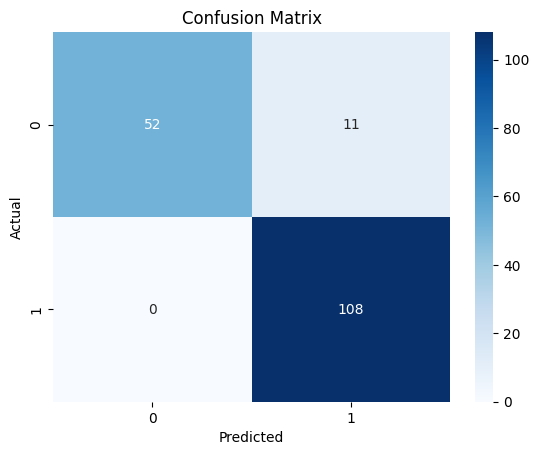

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train SVM and predict
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 18. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE

In [72]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_california_housing

# Load regression dataset
data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.8664984635504496


##19. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score

In [73]:
from sklearn.metrics import roc_auc_score

model = GaussianNB()
model.fit( X_train, y_train)
y_proba = model.predict_proba(X_test)

# ROC-AUC (for binary classification)
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)


ValueError: Unknown label type: (array([0.14999, 0.225  , 0.25   , ..., 4.991  , 5.     , 5.00001]),)

## 20. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

model = SVC(probability=True)
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plotting
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()
